In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
# Se cargan los datos
departments_df = pd.read_csv('departments.csv')
aisles_df = pd.read_csv('aisles.csv')
order_products_train_df = pd.read_csv('order_products__train.csv')
orders_df = pd.read_csv('orders.csv')
products_df = pd.read_csv('products.csv')
sample_submission_df = pd.read_csv('sample_submission.csv')

In [ ]:
departments_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [ ]:
aisles_df

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [ ]:
order_products_train_df

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [ ]:
orders_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [ ]:
orders_df['order_dow'].value_counts()

0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64

In [ ]:
orders_df['order_hour_of_day'].value_counts()

10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
8     178201
19    140569
20    104292
7      91868
21     78109
22     61468
23     40043
6      30529
0      22758
1      12398
5       9569
2       7539
4       5527
3       5474
Name: order_hour_of_day, dtype: int64

In [ ]:
products_df

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [ ]:
sample_submission_df

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259
...,...,...
74995,3420740,39276 29259
74996,3420877,39276 29259
74997,3420888,39276 29259
74998,3420989,39276 29259


In [ ]:
#Unimos los datos de "orders", "order_products__train" y "products", ya que nos
#estaremos enfocando unicamente en los datos de esos conjuntos.

customer_data = pd.merge(orders_df, order_products_train_df, on='order_id')
customer_data = pd.merge(customer_data, products_df, on='product_id')

customer_data

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3351563,206110,train,5,3,13,7.0,22165,22,0,Chewy Reduced Sugar Granola Bars Variety Pack,48,14
1384613,2629221,206125,train,14,6,13,30.0,31540,5,0,Plain Flavor Probiotic Acidophilus,70,11
1384614,2721635,206149,train,6,6,10,30.0,44507,2,1,"100% Juice, Rio Red Grapefruit",98,7
1384615,2078948,206155,train,15,3,11,15.0,47814,1,1,Puppy Complete Nutrition Chicken & Beef Dinner...,40,8


#Análisis exploratorio de datos


In [ ]:
# Se verifica la estructura del conjunto de datos
print("Información del conjunto de datos:")
print(customer_data.info())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   user_id                 1384617 non-null  int64  
 2   eval_set                1384617 non-null  object 
 3   order_number            1384617 non-null  int64  
 4   order_dow               1384617 non-null  int64  
 5   order_hour_of_day       1384617 non-null  int64  
 6   days_since_prior_order  1384617 non-null  float64
 7   product_id              1384617 non-null  int64  
 8   add_to_cart_order       1384617 non-null  int64  
 9   reordered               1384617 non-null  int64  
 10  product_name            1384617 non-null  object 
 11  aisle_id                1384617 non-null  int64  
 12  department_id           1384617 non-null  int64  
dtypes: float64(1), int64(1

In [ ]:
# Se muestran las estadísticas descriptivas de todas las variables relevantes
print("\nEstadísticas Descriptivas:")
customer_data.describe(include='all')


Estadísticas Descriptivas:


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
count,1.384617e+06,1.384617e+06,1384617,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1384617,1.384617e+06,1.384617e+06
unique,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39123,NaN,NaN
top,NaN,NaN,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Banana,NaN,NaN
freq,NaN,NaN,1384617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18726,NaN,NaN
mean,1.706298e+06,1.031128e+05,NaN,1.709141e+01,2.701392e+00,1.357759e+01,1.706613e+01,2.555624e+04,8.758044e+00,5.985944e-01,NaN,7.130423e+01,9.839777e+00
std,9.897326e+05,5.948715e+04,NaN,1.661404e+01,2.167646e+00,4.238458e+00,1.042642e+01,1.412127e+04,7.423936e+00,4.901829e-01,NaN,3.810409e+01,6.292830e+00
min,1.000000e+00,1.000000e+00,NaN,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,NaN,1.000000e+00,1.000000e+00
25%,8.433700e+05,5.173200e+04,NaN,6.000000e+00,1.000000e+00,1.000000e+01,7.000000e+00,1.338000e+04,3.000000e+00,0.000000e+00,NaN,3.100000e+01,4.000000e+00
50%,1.701880e+06,1.029330e+05,NaN,1.100000e+01,3.000000e+00,1.400000e+01,1.500000e+01,2.529800e+04,7.000000e+00,1.000000e+00,NaN,8.300000e+01,8.000000e+00
75%,2.568023e+06,1.549590e+05,NaN,2.100000e+01,5.000000e+00,1.700000e+01,3.000000e+01,3.794000e+04,1.200000e+01,1.000000e+00,NaN,1.070000e+02,1.600000e+01


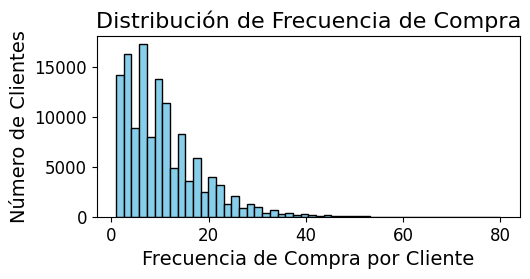

In [ ]:
# Histograma para visualizar la frecuencia de compra por cliente
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.hist(customer_data.groupby('user_id')['order_id'].count(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de Frecuencia de Compra', fontsize=16)
plt.xlabel('Frecuencia de Compra por Cliente', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.show()

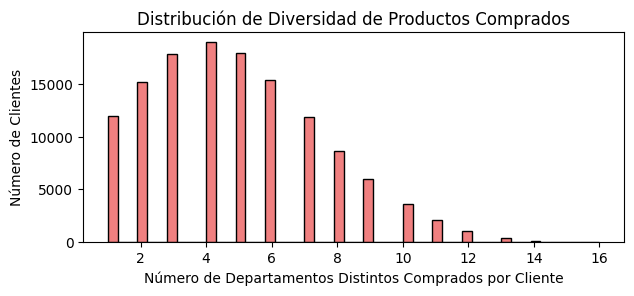

In [ ]:
# Histograma para visualizar la diversidad de productos comprados por cliente
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 2)
plt.hist(customer_data.groupby('user_id')['department_id'].nunique(), bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribución de Diversidad de Productos Comprados')
plt.xlabel('Número de Departamentos Distintos Comprados por Cliente')
plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()

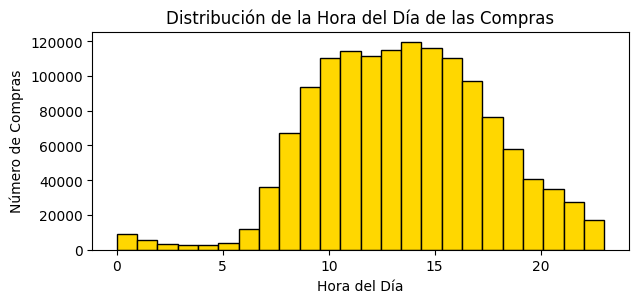

In [ ]:
# Histograma para visualizar la cantidad de compras que se realizan en las horas del día
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 3)
plt.hist(customer_data['order_hour_of_day'], bins=24, color='gold', edgecolor='black')
plt.title('Distribución de la Hora del Día de las Compras')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Compras')
plt.tight_layout()
plt.show()

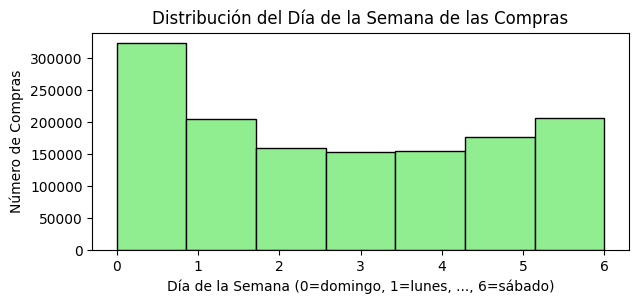

In [ ]:
# Histograma para visualizae los días de la semana en que se realizan la mayoría de las compras
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 4)
plt.hist(customer_data['order_dow'], bins=7, color='lightgreen', edgecolor='black')
plt.title('Distribución del Día de la Semana de las Compras')
plt.xlabel('Día de la Semana (0=domingo, 1=lunes, ..., 6=sábado)')
plt.ylabel('Número de Compras')
plt.tight_layout()
plt.show()

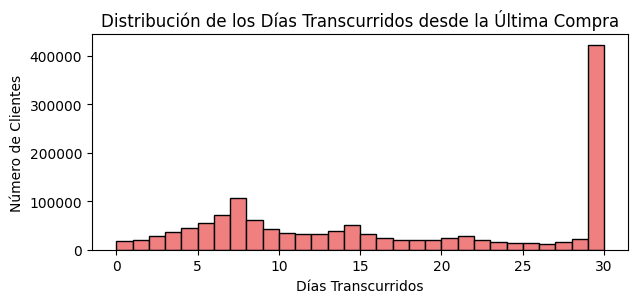

In [ ]:
# Histograma para visualizar la duración media entre órdenes
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 5)
plt.hist(customer_data['days_since_prior_order'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribución de los Días Transcurridos desde la Última Compra')
plt.xlabel('Días Transcurridos')
plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()

### **Elección de variables:**

En este caso, tomando en cuenta los histogramas mostrados anteriormente, se puede notar una diferencia característica en el histograma de "Distribución de la Hora del Día de las Compras". Podemos observar un a diferencia entre los horarios de 0-12:00 pm y 12:00 pm en adelante. Por lo que en base a eso, considero que sería una buena opción el analizar que el total de compras de los productos por hora y ver si existe una diferencia significativa entre los consumos de los clientes en cuanto al horario.

Variables seleccionadas:
*  Total de Compras por Producto: La cantidad total de compras de un producto puede ser un indicador clave del interés y preferencia del cliente. Los productos con un alto número de compras pueden ser destacados para estrategias de marketing específicas y para entender mejor las preferencias del cliente.
*  Hora del Día de la Orden: El momento del día en que los clientes realizan sus compras puede proporcionar información sobre sus hábitos de compra y rutinas.

 La combinación de estas variables puede ayudar a identificar grupos de clientes con comportamientos similares, lo que es fundamental para la segmentación efectiva.


In [ ]:
#Se obtiene el número de ordenes por hora
orders_hours = customer_data.groupby('order_hour_of_day')['order_id'].count().reset_index()
orders_hours

,order_hour_of_day,order_id
0,0,9083
1,1,5626
2,2,3226
3,3,2438
4,4,2431
5,5,3847
6,6,11847
7,7,36302
8,8,67386
9,9,93856


In [ ]:
#Se actualiza la columna del total de las ordenes
orders_hours.columns = ['order_hour_of_day', 'total_orders']
orders_hours

,order_hour_of_day,total_orders
0,0,9083
1,1,5626
2,2,3226
3,3,2438
4,4,2431
5,5,3847
6,6,11847
7,7,36302
8,8,67386
9,9,93856


In [ ]:
#Se seleccionan las columnas que se utilizarán para la segmentación de clientes
#y se guardan en una variable
segmented_data = orders_hours[['order_hour_of_day', 'total_orders']]
segmented_data

,order_hour_of_day,total_orders
0,0,9083
1,1,5626
2,2,3226
3,3,2438
4,4,2431
5,5,3847
6,6,11847
7,7,36302
8,8,67386
9,9,93856


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

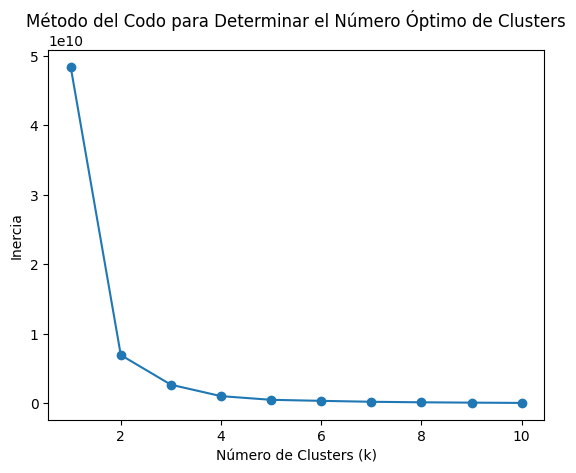

In [ ]:
#Método del Codo

# Se calcula la inercia para diferentes valores de k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(segmented_data)
    inertia.append(kmeans.inertia_)

# Se visualiza el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()


En este caso tomando en cuenta los resultados del gráfico se decidirá el número de clusters como 4.


In [ ]:
# Se aplica K-means
kmeans = KMeans(n_clusters=4, random_state=42)

# Se añaden las etiquetas de cluster al DataFrame original
orders_hours['cluster'] = kmeans.fit_predict(segmented_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


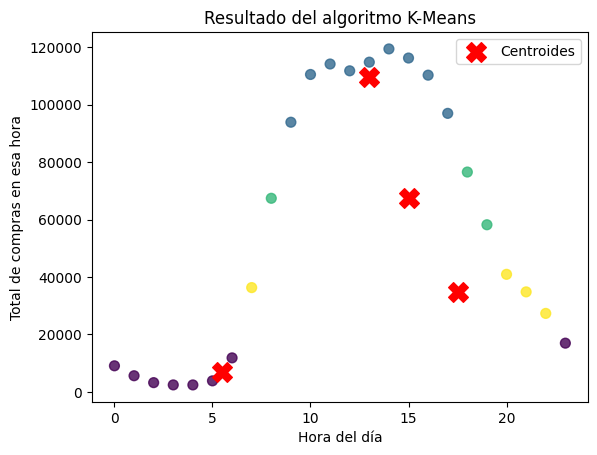

In [ ]:
# Para la visualización de los resultados
plt.scatter(orders_hours['order_hour_of_day'], orders_hours['total_orders'], c=orders_hours['cluster'], cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Centroides')
plt.title('Resultado del algoritmo K-Means')
plt.xlabel('Hora del día')
plt.ylabel('Total de compras en esa hora')
plt.legend()
plt.show()


En este caso, si analizamos el gráfico podemos notar que la cantidad de productos adquiridos empieza muy baja en las primeras horas del día, después, las dicha cantidad empieza a subir hasta llegar a su punto más alto entre las 10-16 horas. Después proceden a bajar conforme avanza el día, hasta llegar a la noche. Esta información podría ser esencial para una tienda, ya que teniendo en cuenta los horarios que son más demandados para la compra de productos, podrían estar seguros de que a tales horas el stock de dichos productos este completo, cambiar las posiciones de venta por unas más accesibles para los clientes, implementar estrategias de mercado, etc.

In [ ]:
#Al dataframe se le agregaron los clusters en la parte de K-means para identificarlos mejor
orders_hours

,order_hour_of_day,total_orders,cluster
0,0,9083,0
1,1,5626,0
2,2,3226,0
3,3,2438,0
4,4,2431,0
5,5,3847,0
6,6,11847,0
7,7,36302,3
8,8,67386,2
9,9,93856,1


In [ ]:
#Contando el numero de puntos que tiene cada cluster
orders_hours['cluster'].value_counts()

1    9
0    8
3    4
2    3
Name: cluster, dtype: int64

In [ ]:
orders_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   order_hour_of_day  24 non-null     int64
 1   total_orders       24 non-null     int64
 2   cluster            24 non-null     int32
dtypes: int32(1), int64(2)
memory usage: 608.0 bytes


In [ ]:
orders_hours.describe().T

,count,mean,std,min,25%,50%,75%,max
order_hour_of_day,24.0,11.500,7.071068,0.0,5.75,11.5,17.25,23.0
total_orders,24.0,57692.375,45885.938278,2431.0,11156.00,49547.5,110297.50,119370.0
cluster,24.0,1.125,1.075922,0.0,0.00,1.0,2.00,3.0


#Reglas de asociacion con el grupo seleccionado

##Cluster #1

##Características del Cluster 1

En este caso resumiendo la información que podemos obtener del Cluster 1, tenemos las siguientes características:

- Entre el rango de horas de 9-17 se tienen registradas 93587 ordenes.
- Los usuarios con más ordenes en dicho horario tienen los siguientes usuarios: "197541" y "149753" ambos con 80 ordenes cada uno.
- Los 5 productos más vendidos en este conjunto son: Banana (13129 ventas), Bag of Organiz Bananas (10876 ventas), Organic Strawberries (7559 ventas), Organic Baby Spinach (7005) y Large Lemon (5907).
- Los productos más vendidos en ese horario están dentro de la categoría de "Frutas y Verduras".
- Los productos menos vendidos de este conjunto son los siguientes: Peanut Caramel Candy Bars, Quattro For Women Refill Blades, Fat Free Thousand Island Dressing Syrup, Boysenberry, Puppy Complete Nutrition Chicken & Beef Dinner Wet Dog Food; cada uno con 1 sola venta.
- En este caso, tomando en cuenta los productos más vendidos, obtenemos que los pasillos con más ventas (en este conjunto) son los de "Fresh vegetables" y "Fresh fruits".


In [ ]:
#Se preparan los datos para las reglas de asociación
customer_data_association = pd.merge(orders_df, order_products_train_df, on='order_id')
customer_data_association = pd.merge(customer_data_association, products_df, on='product_id')

customer_data_association

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3351563,206110,train,5,3,13,7.0,22165,22,0,Chewy Reduced Sugar Granola Bars Variety Pack,48,14
1384613,2629221,206125,train,14,6,13,30.0,31540,5,0,Plain Flavor Probiotic Acidophilus,70,11
1384614,2721635,206149,train,6,6,10,30.0,44507,2,1,"100% Juice, Rio Red Grapefruit",98,7
1384615,2078948,206155,train,15,3,11,15.0,47814,1,1,Puppy Complete Nutrition Chicken & Beef Dinner...,40,8


In [ ]:
#Como seleccionamos el cluster #1 solo tomaremos los datos de que contiene este grupo
#En este caso las horas del rango de 9 a 17
association_data = customer_data_association[(customer_data_association['order_hour_of_day'] >= 9) & (customer_data_association['order_hour_of_day'] <= 17)]
association_data

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7
5,692135,865,train,4,5,11,30.0,196,1,0,Soda,77,7
6,3289231,992,train,22,5,14,30.0,196,6,1,Soda,77,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384611,3351563,206110,train,5,3,13,7.0,3794,12,0,Pimiento Stuffed Spanish Olives,110,13
1384612,3351563,206110,train,5,3,13,7.0,22165,22,0,Chewy Reduced Sugar Granola Bars Variety Pack,48,14
1384613,2629221,206125,train,14,6,13,30.0,31540,5,0,Plain Flavor Probiotic Acidophilus,70,11
1384614,2721635,206149,train,6,6,10,30.0,44507,2,1,"100% Juice, Rio Red Grapefruit",98,7


In [ ]:
#De igual manera se hace una comprobación para asegurar que solo existan los
#datos que se necesitan
association_data['order_hour_of_day'].value_counts()

14    119370
15    116198
13    114762
11    114119
12    111752
10    110479
16    110237
17     96944
9      93856
Name: order_hour_of_day, dtype: int64

In [ ]:
#Seleccionamos las columnas que nececitemos
columns = ['order_id','user_id', 'product_id', 'product_name', 'order_hour_of_day']
association_data_segmented = association_data[columns]
association_data_segmented

,order_id,user_id,product_id,product_name,order_hour_of_day
1,2757217,67,196,Soda,11
2,632715,676,196,Soda,13
3,1167274,760,196,Soda,10
5,692135,865,196,Soda,11
6,3289231,992,196,Soda,14
...,...,...,...,...,...
1384611,3351563,206110,3794,Pimiento Stuffed Spanish Olives,13
1384612,3351563,206110,22165,Chewy Reduced Sugar Granola Bars Variety Pack,13
1384613,2629221,206125,31540,Plain Flavor Probiotic Acidophilus,13
1384614,2721635,206149,44507,"100% Juice, Rio Red Grapefruit",10


In [ ]:
#Se seleccionan las columnas requeridas
columns2 = ['order_id','user_id', 'product_id', 'product_name']
association_data_segmented2 = association_data[columns2]
association_data_segmented2

,order_id,user_id,product_id,product_name
1,2757217,67,196,Soda
2,632715,676,196,Soda
3,1167274,760,196,Soda
5,692135,865,196,Soda
6,3289231,992,196,Soda
...,...,...,...,...
1384611,3351563,206110,3794,Pimiento Stuffed Spanish Olives
1384612,3351563,206110,22165,Chewy Reduced Sugar Granola Bars Variety Pack
1384613,2629221,206125,31540,Plain Flavor Probiotic Acidophilus
1384614,2721635,206149,44507,"100% Juice, Rio Red Grapefruit"


In [ ]:
#Se obtiene el total de productos comprados dentro del rango de horas
association_data_segmented2['product_name'].value_counts()

Banana                                                         13129
Bag of Organic Bananas                                         10876
Organic Strawberries                                            7559
Organic Baby Spinach                                            7005
Large Lemon                                                     5907
                                                               ...  
Peanut Caramel Candy Bars                                          1
Quattro For Women Refill Blades,                                   1
Fat Free Thousand Island Dressing                                  1
Syrup, Boysenberry                                                 1
Puppy Complete Nutrition Chicken & Beef Dinner Wet Dog Food        1
Name: product_name, Length: 36252, dtype: int64

In [ ]:
#Se obtiene la cantidad de ordenes que hizo cada usuario dentro del rango de horas
association_data_segmented2['user_id'].value_counts()

197541    80
149753    80
83993     76
169647    75
104741    74
          ..
66257      1
70198      1
148656     1
139733     1
205824     1
Name: user_id, Length: 93587, dtype: int64

In [ ]:
#Se actualiza el indice por el id del usuario
association_data_segmented2.set_index('user_id', inplace = True)
association_data_segmented2

,order_id,product_id,product_name
user_id,,,
67,2757217,196,Soda
676,632715,196,Soda
760,1167274,196,Soda
865,692135,196,Soda
992,3289231,196,Soda
...,...,...,...
206110,3351563,3794,Pimiento Stuffed Spanish Olives
206110,3351563,22165,Chewy Reduced Sugar Granola Bars Variety Pack
206125,2629221,31540,Plain Flavor Probiotic Acidophilus


In [ ]:
pip install apyori

In [ ]:
from apyori import apriori

In [ ]:
#Se crea una lista de listas segun los productos que compro cada usuario
user_transactions = association_data_segmented2.groupby('user_id')['product_name'].apply(list).tolist()
user_transactions

[['Organic Roasted Turkey Breast',
  'Gluten Free Whole Grain Bread',
  'Plantain Chips',
  'Chipotle Beef & Pork Realstick',
  'Bartlett Pears',
  "Organic D'Anjou Pears",
  'Asian Pears',
  'Banana',
  'Honeycrisp Apple',
  'Granny Smith Apples',
  'Small Hass Avocado',
  'Unsweetened Almondmilk',
  'Bubblegum Flavor Natural Chewing Gum',
  'Uncured Slow Cooked Ham',
  'Organic All Day Fresh Deodorant Lavender',
  'Chicken Caesar Salad',
  'Kitchen Cheese Enchilada',
  'Pad Thai',
  'Vegetable Lasagna',
  'Indian Paneer Tikka',
  'Mexican Casserole Bowl',
  'Gluten Free Mushroom Risotto Bowl',
  'Black Bean Vegetables Burrito',
  'Organic Light In Sodium Butternut Squash Soup',
  'Birthday Cake Light Ice Cream',
  'Mint Chip',
  'Pistachio Ice Cream',
  'Shelled Pistachios',
  'Dark Chocolate Nuts & Sea Salt Bars',
  'Organic Cashew Carrot Ginger Soup',
  'Organic Hearty Split Pea & Uncured Ham Soup'],
 ['Organic Raw Agave Nectar',
  'Organic Large Extra Fancy Fuji Apple',
  'Sharp C

In [ ]:
#Aplicando apriori
rules = list(apriori(user_transactions, min_support = 0.001, min_confidence = 0.1, lift = 1.0))
rules

[RelationRecord(items=frozenset({'Bag of Organic Bananas'}), support=0.11621272185239404, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Bag of Organic Bananas'}), confidence=0.11621272185239404, lift=1.0)]),
 RelationRecord(items=frozenset({'Banana'}), support=0.14028657826407515, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Banana'}), confidence=0.14028657826407515, lift=1.0)]),
 RelationRecord(items=frozenset({'Bag of Organic Bananas', '100% Raw Coconut Water'}), support=0.0027567931443469714, ordered_statistics=[OrderedStatistic(items_base=frozenset({'100% Raw Coconut Water'}), items_add=frozenset({'Bag of Organic Bananas'}), confidence=0.28013029315960913, lift=2.410495931034235)]),
 RelationRecord(items=frozenset({'Banana', '100% Raw Coconut Water'}), support=0.0011646916772628678, ordered_statistics=[OrderedStatistic(items_base=frozenset({'100% Raw Coconut Water'}), items_add=frozenset({'Banana'}), confide

In [ ]:
#Se crea un dataframe para las reglas de asociación
association_result_df = pd.DataFrame(columns=['Antecedente', 'Consecuente', 'Soporte', 'Confianza', 'Lift'])

In [ ]:
#Se pasa cada resultado de las reglas al dataframe
for result in rules:
    antecedente = tuple(result.items)[0] if result.items else None
    consecuente = tuple(result.items)[1] if len(result.items) > 1 else None
    soporte = result.support
    confianza = result.ordered_statistics[0].confidence
    levantamiento = result.ordered_statistics[0].lift

    association_result_df = association_result_df.append({
        'Antecedente': antecedente,
        'Consecuente': consecuente,
        'Soporte': soporte,
        'Confianza': confianza,
        'Lift': levantamiento
    }, ignore_index=True)

<ipython-input-43-3b06fcc149bd>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  association_result_df = association_result_df.append({
<ipython-input-43-3b06fcc149bd>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  association_result_df = association_result_df.append({
<ipython-input-43-3b06fcc149bd>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  association_result_df = association_result_df.append({
<ipython-input-43-3b06fcc149bd>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  association_result_df = association_result_df.append({
<ipython-input-43-3b06fcc149bd>:9: FutureWarning: The frame.append method is deprecated and will be 

In [ ]:
association_result_df

,Antecedente,Consecuente,Soporte,Confianza,Lift
0,Bag of Organic Bananas,None,0.116213,0.116213,1.000000
1,Banana,None,0.140287,0.140287,1.000000
2,Bag of Organic Bananas,100% Raw Coconut Water,0.002757,0.280130,2.410496
3,Banana,100% Raw Coconut Water,0.001165,0.118350,0.843628
4,100% Raw Coconut Water,Organic Baby Spinach,0.001207,0.122693,1.639178
...,...,...,...,...,...
1818,Bag of Organic Bananas,Organic Baby Spinach,0.001197,0.125000,5.528533
1819,Bag of Organic Bananas,Organic Cucumber,0.001036,0.105206,9.210403
1820,Bag of Organic Bananas,Organic Raspberries,0.001699,0.130542,11.428459
1821,Banana,Limes,0.001079,0.108719,10.319158


In [ ]:
# Se eliminan las filas con "None" en la columna "Consecuente"
association_result_df = association_result_df.dropna(subset=['Consecuente'])

In [ ]:
association_result_df

,Antecedente,Consecuente,Soporte,Confianza,Lift
2,Bag of Organic Bananas,100% Raw Coconut Water,0.002757,0.280130,2.410496
3,Banana,100% Raw Coconut Water,0.001165,0.118350,0.843628
4,100% Raw Coconut Water,Organic Baby Spinach,0.001207,0.122693,1.639178
5,100% Raw Coconut Water,Organic Hass Avocado,0.001646,0.167210,3.023308
6,Organic Raspberries,100% Raw Coconut Water,0.001272,0.129207,3.142446
...,...,...,...,...,...
1818,Bag of Organic Bananas,Organic Baby Spinach,0.001197,0.125000,5.528533
1819,Bag of Organic Bananas,Organic Cucumber,0.001036,0.105206,9.210403
1820,Bag of Organic Bananas,Organic Raspberries,0.001699,0.130542,11.428459
1821,Banana,Limes,0.001079,0.108719,10.319158


In [ ]:
# Ordenar el DataFrame por lift en orden descendente
sorted_results = association_result_df.sort_values(by='Lift', ascending=False)

# Visualizar las primeras filas con mayor confianza
top_lift_results = sorted_results.head(10)
top_lift_results

,Antecedente,Consecuente,Soporte,Confianza,Lift
530,Strawberry Rhubarb Yoghurt,Blueberry Yoghurt,0.001229,0.318560,88.465974
688,Icelandic Style Skyr Blueberry Non-fat Yogurt,Non Fat Acai & Mixed Berries Yogurt,0.001389,0.257426,82.789357
858,Non Fat Raspberry Yogurt,Nonfat Icelandic Style Strawberry Yogurt,0.001004,0.232099,81.353660
690,Icelandic Style Skyr Blueberry Non-fat Yogurt,Nonfat Icelandic Style Strawberry Yogurt,0.001218,0.225743,79.125731
526,Blackberry Cucumber Sparkling Water,Kiwi Sandia Sparkling Water,0.001218,0.285000,75.989444
857,Non Fat Raspberry Yogurt,Non Fat Acai & Mixed Berries Yogurt,0.001015,0.326460,75.438166
689,Icelandic Style Skyr Blueberry Non-fat Yogurt,Non Fat Raspberry Yogurt,0.001646,0.304950,70.467659
638,Grapefruit Sparkling Water,Lemon Sparkling Water,0.001122,0.216049,60.537166
1404,Total 2% Lowfat Greek Strained Yogurt with Peach,Total 2% Greek Strained Yogurt with Cherry 5.3 oz,0.001368,0.283814,59.025060
1406,Total 2% Lowfat Greek Strained Yogurt with Peach,Total 2% Lowfat Greek Strained Yogurt With Blu...,0.001368,0.270613,56.279709


En este caso, haciendo una breve descripción de las columnas, tenemos que el antecedente es el artículo que se compra primero, y el consecuente es el artículo que se compra después; el soporte es la proporción de transacciones que contienen tanto el antecedente como el consecuente; la confianza es la probabilidad condicional de que se compre el consecuente dado que ya se ha comprado el antecedente y el lift indica cuánto más probable es que se compre el consecuente dado el antecedente en comparación con si fueran eventos independientes.

Tomando en cuenta lo anterior y obtenemos los productos que se compran juntos frecuentemente en este segmento:

- Regla 530: "Strawberry Rhubarb Yoghurt" -> "Blueberry Yoghurt"
    - Soporte: 0.001229 (aparece en el 0.12% de las transacciones).
    - Confianza: 0.318560 (aproximadamente el 31.86% de las veces que se compra Strawberry Rhubarb Yoghurt, también se compra Blueberry Yoghurt).
    - Lift: 88.465974 (el hecho de comprar Strawberry Rhubarb Yoghurt aumenta 88.47 veces la probabilidad de comprar Blueberry Yoghurt en comparación con si fueran comprados independientemente).

- Regla 688: "Icelandic Style Skyr Blueberry Non-fat Yogurt" -> "Non Fat Acai & Mixed Berries Yogurt"
  - Soporte: 0.001389 (aparece en el 0.14% de las transacciones).
  - Confianza: 0.257426 (aproximadamente el 25.74% de las veces que se compra Icelandic Style Skyr Blueberry Non-fat Yogurt, también se compra Non Fat Acai & Mixed Berries Yogurt).
  - Lift: 82.789357 (el hecho de comprar Icelandic Style Skyr Blueberry Non-fat Yogurt aumenta 82.79 veces la probabilidad de comprar Non Fat Acai & Mixed Berries Yogurt en comparación con si fueran comprados independientemente).

- Regla 858: "Non Fat Raspberry Yogurt" -> "Nonfat Icelandic Style Strawberry Yogurt"
  - Soporte: 0.001004 (aparece en el 0.10% de las transacciones).
  - Confianza: 0.232099 (aproximadamente el 23.21% de las veces que se compra Non Fat Raspberry Yogurt, también se compra Nonfat Icelandic Style Strawberry Yogurt).
  - Lift: 81.353660 (el hecho de comprar Non Fat Raspberry Yogurt aumenta 81.35 veces la probabilidad de comprar Nonfat Icelandic Style Strawberry Yogurt en comparación con si fueran comprados independientemente).